Gabriela Vega
Machine Learning
Assignment 2
Shallow Models Training, Validation and Tuning


In [70]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


TASK 1: EDA

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset
df = pd.read_csv("/Users/gabyvega/Downloads/bike+sharing+dataset/hour.csv")

# displaying basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


EXPLANATION FOR CODE BELOW:
In the section below I am making a distribution of of our target value which is cnt (the total number of bike rentals per hour ). I used a histogram to display the shape and spread of this distribution as well as looking at the skewness of it. From the results we can see that the distribution has a very intense right skew where the majority of rentals fall between 0 and 100. In our context, this means that their is a peak time with higher counts and then relatively low rental activity through the rest of the hours.  

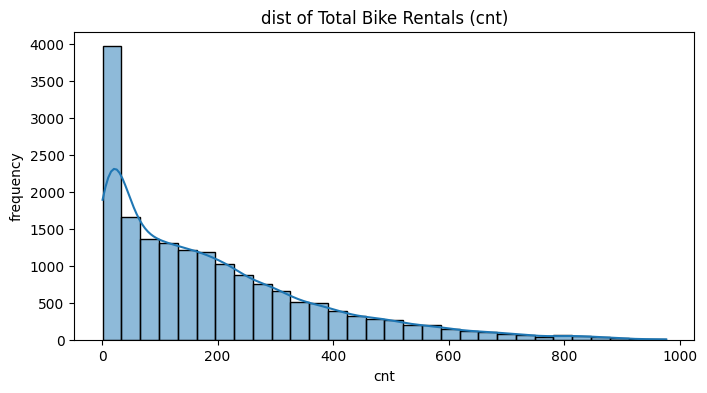

skewness of cnt: 1.2774116037490577


In [ ]:
#checking target value dist

plt.figure(figsize=(8, 4))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('dist of total bike rentals (cnt)')
plt.xlabel('cnt')
plt.ylabel('frequency')
plt.show()

# skewness
print("skewness of cnt:", df['cnt'].skew())


EXPLANATION FOR CODE BELOW:
In the code below we are looking at rental activity changes because of time related features. I used boxplots to show the total rentals grouped by hour, weekday, month and season; this way we can look at the effect and importance of these features on our target (cnt). 

The rentals by hour show that rentals go up around 8 am and then again from 5-6pm, which is consistent with most peoples work schedules. Thois means that hour is an important factor that will likely play a role in our prediction.  

The rentals by weekday is pretty consistent accross all days in the week. The implies that weekday might be less relevant in our prediction.

The rentals by month show that in the middle of the year (from around april to september), there is a surge in activity. These are also the warmer months in the year meaning that the weather may be playing a role in results. 

The rentals by season confirm what the months boxplot implied as it shows that bike rentals are lower in the winter months (colder months) and highest in the summer months (hottest months). This again implies that temperature seems to be an important variable to consider. 

Overall, this section shows that hours, months and seasons are gonna be important in our prediction model while weekday by itself seems to be less meaningful (though it could become important when combined with other variables like holidays)

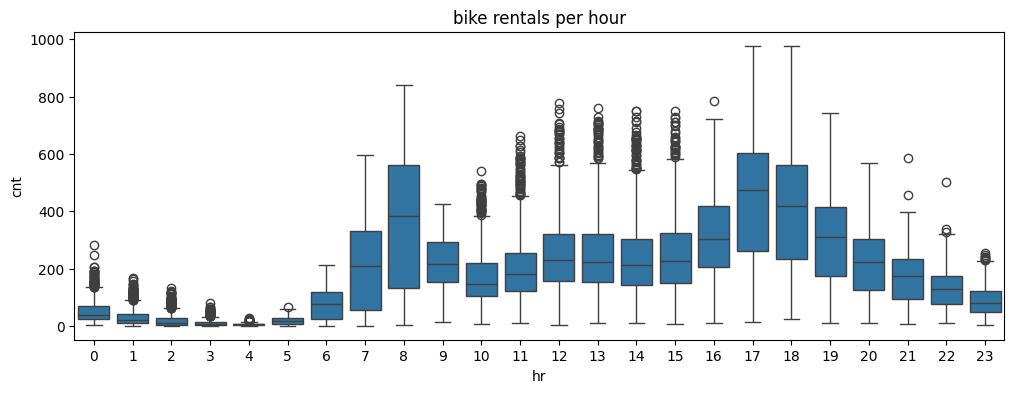

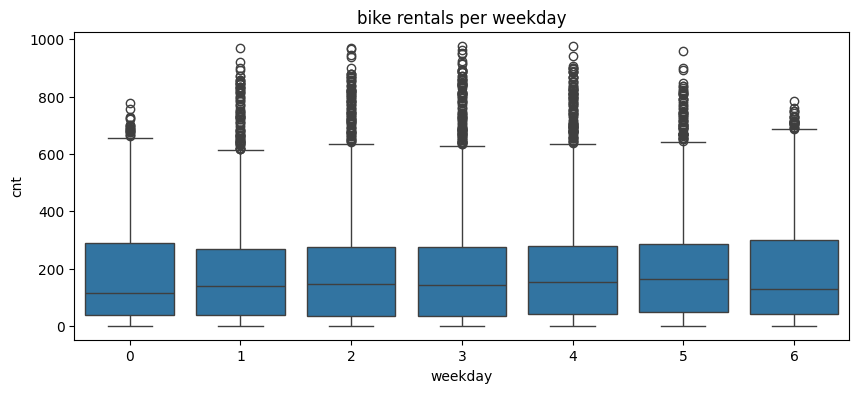

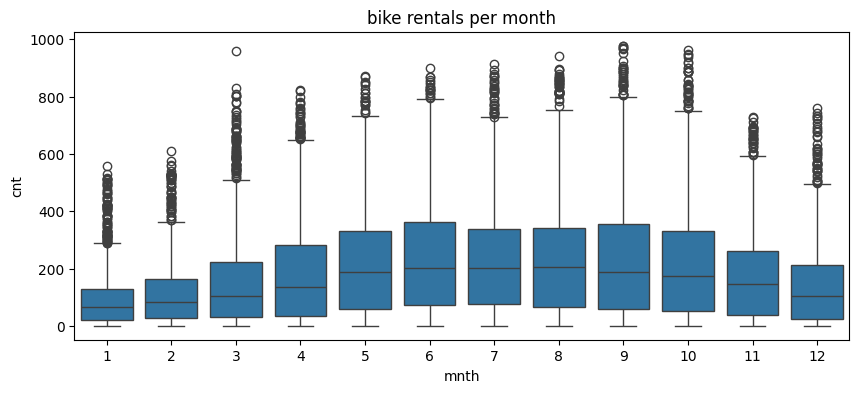

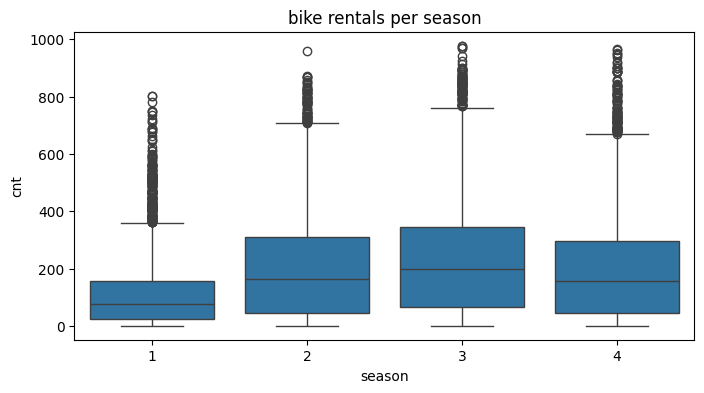

In [ ]:
#temporal features

# rentals by hour
plt.figure(figsize=(12, 4))
sns.boxplot(x='hr', y='cnt', data=df)
plt.title('bike rentals by hour')
plt.show()

# rentals by weekday
plt.figure(figsize=(10, 4))
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('bike rentals by weekday')
plt.show()

# rentals by month
plt.figure(figsize=(10, 4))
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('bike rentals by month')
plt.show()

# rentals by season
plt.figure(figsize=(8, 4))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('bike rentals by season')
plt.show()


EXPLANATION FOR CODE BELOW:
This next section examines how binary features like holidays and working days impact rental count. We are analyzing these as they could provide more information on the behavior patterns linked to the day types. The first boxplot examines bike rentals on a holiday vs non holiday and it shows that rentals on non holidays are a little bit higher than rentals on holidays. The working day vs non working day shows that on working days the bike rentals are higher than on non working days. The differences in both boxplots are not super dramatic, meaning that both these categories may have a slight inluence but their individual impact is limited. 

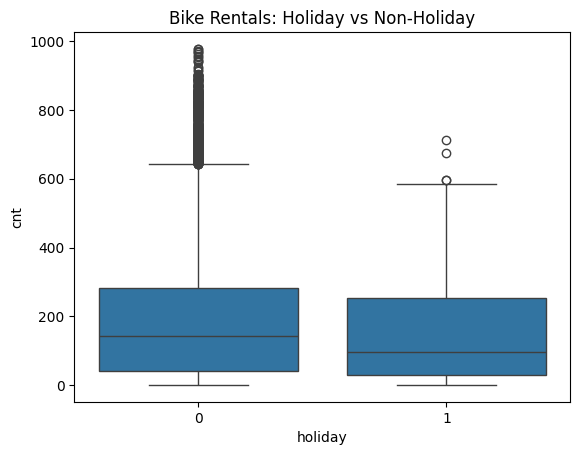

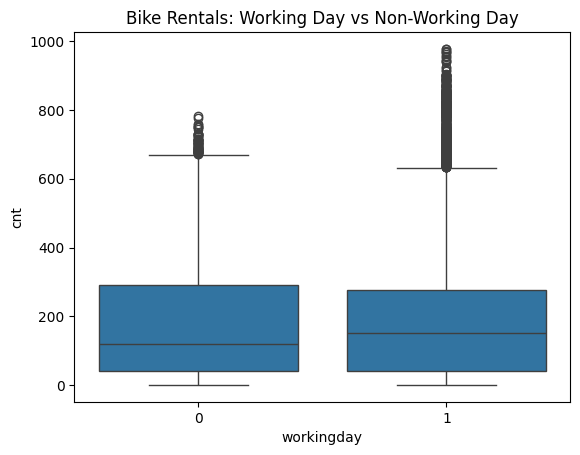

In [ ]:
#binary features 

# rentals by holiday
sns.boxplot(x='holiday', y='cnt', data=df)
plt.title('bike rentals: holiday vs non-holiday')
plt.show()

# rentals by working day
sns.boxplot(x='workingday', y='cnt', data=df)
plt.title('bike rentals: working day vs non-working Day')
plt.show()


EXPLANATION FOR CODE BELOW:
The section of code below I am analyzing how weather related variables impact bike rentals. I took all our weather realted features (temp, atemp, humidity and windspeed).I first used a correlation heatmap to look at each feature vs our target value. The heatmap showed a very high correlation of .99 between atemp and temp which means they are essentially redundant against eachother (which makes sense logically as they are opposites of eachother). Both the temp values also showed a correlation of about .4 with cnt which indicates that warmer weather is associated with higher bike rental. On the other hand, humidity and windspeed showed a weaker correlation meaning that their influence is likely more subtle. The scatterplots further examined that the relationship of temperature and cnt indicates a peak in rentals during moderate values and then declines near the end when it gets too warm. Humidity shows a generally weak trend again, but it did show that higher humidity levels appear to decrease bike rentals slightly. Windspeed shows had a generally slightly negative relationship meaning that the more windy it is outside the less likely biking activity may be. 

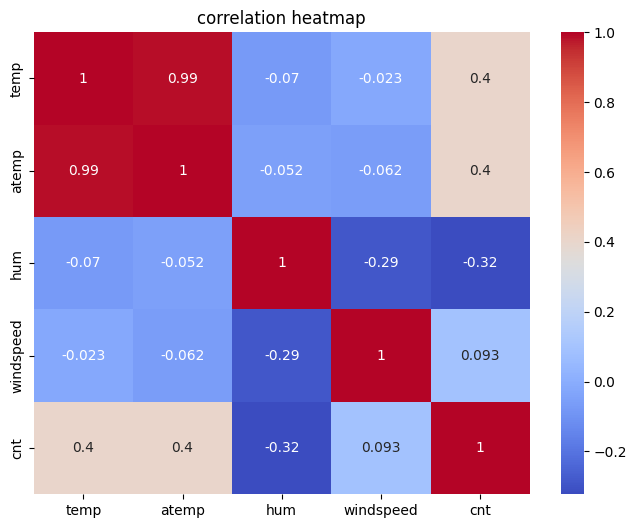

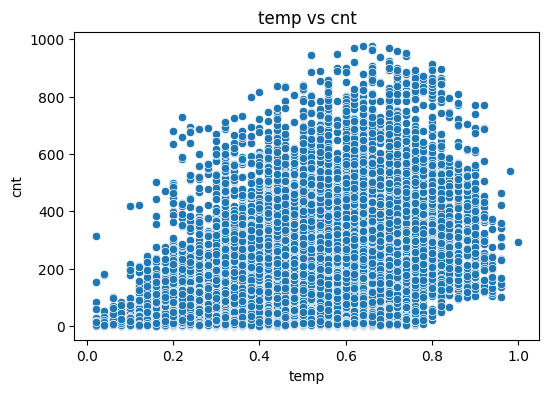

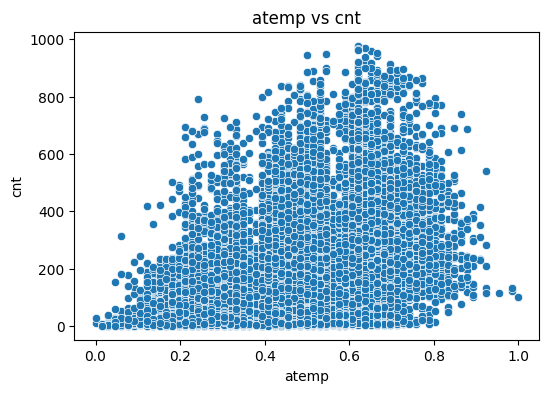

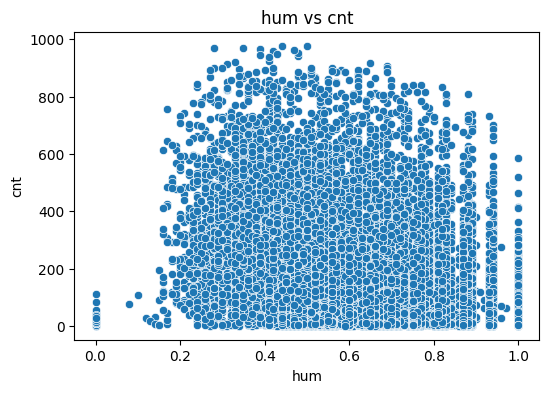

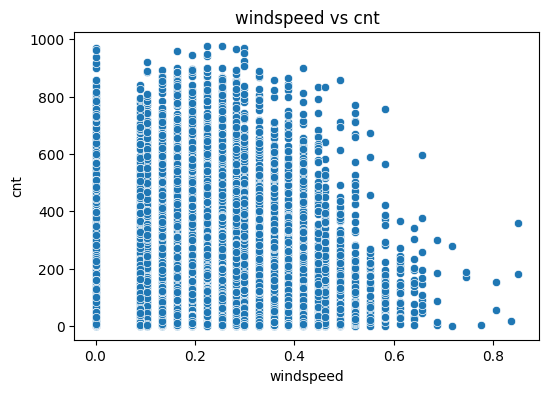

In [ ]:
#weather related features

# correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

# scatter plots
features = ['temp', 'atemp', 'humidity', 'windspeed']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='cnt')
    plt.title(f'{feature} vs cnt')
    plt.show()


EXPLANATION FOR CODE BELOW:
In the section below I am first looking for potential outliers in my numerical features (cnt, temp, hum and windspeed) and I am visualizing this with a boxplot because it allows me to quickly and easily see which values fall outside the typical range. The cnt variable contains numerous outliers which is expected since as we discussed before, there are hours in the day with significant more demand than others. Since these values correspond to real world peak times I am interpreting them not as outliers/errors and rather as important data points. The rest of the features (temp, humidity and windpseed) all appear to be generally well distributed which means that there is not an immediate need for any type of transformation. While I could have used outlier removal technniques (like zscore filering or IQL thresholding) I chose to not do this as the points represent demand patters that will contribute to an accurate model rather than exceptions. 

After checking the outliers, I dropped values that are leaky or not relevant to our prediction. I first dropped "instant" because it is an ID column that has no real predictive worth at it is an arbitrary value. I dropped "dteday" since it duplicates data info that is already encoded in our other time based features. Finally, I dropped "casual" and "regisistered" because they directly sum up to form our target variable (cnt). Keeping these would introduce data leakage into our model because the model would learn to cnt by summing these two. Removing them makes sure that the model only learns from our other contextual features. 


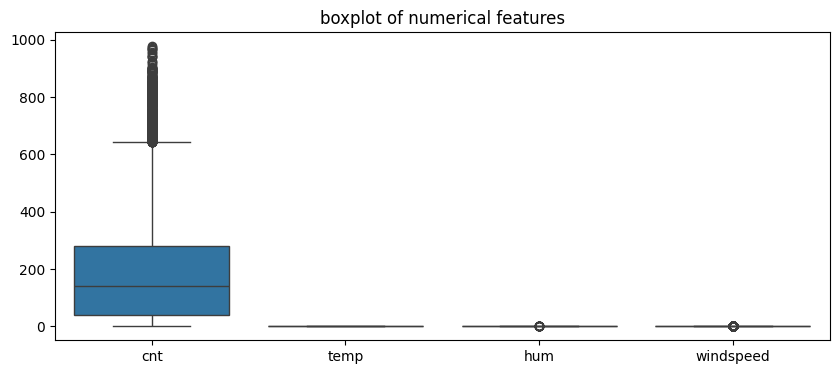

In [ ]:
# outliers and dropping some columns

# looking for potential outliers
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['cnt', 'temp', 'humidity', 'windspeed']])
plt.title('boxplot of numerical features')
plt.show()

# dropping unused or leaky columns
df.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)


TASK 2: Data Splitting

EXPLANATION FOR CODE BELOW:
In this next step we are splitting the dataset into seperate training, testing and validation sets. First, I am seperating the target value from the feature set as this is what we are trying to predict. Then I do a 2-step splitting process where the first split divides the dataset to become 0.6 to the training set and the remaining .4 to a temporary set. After this, the temp set is further split equally into the training and validation set (so each one recieves .2 of the overall dataset). This approach is ensuring that the model is trained on one portion of the data, tuned on another and then tested on a never seen before portion. Another way to split the dataset would have been to use K-fold, but because our dataset is decently large the method we used is more fitting as it balances efficiency with model integrity better. I ended up choosing a 60-40 split because it is pretty balanced and a good option when working with medium to large datasets as we are. 

In [ ]:
from sklearn.model_selection import train_test_split

# creating features (X) and target (y)
X = df.drop('cnt', axis=1)
y = df['cnt']

# first split: 60% train, 40% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=42)

# scond split: 50% validation, 50% test of the temp set → 20% each overall
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# final sizes
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 10427 samples
Validation set: 3476 samples
Test set: 3476 samples


TASK 3: Feature Engineering

In [78]:
#cyclical encoding

import numpy as np

# Apply cyclical encoding
for df_ in [X_train, X_val, X_test]:
    df_['hr_sin'] = np.sin(2 * np.pi * df_['hr'] / 24)
    df_['hr_cos'] = np.cos(2 * np.pi * df_['hr'] / 24)
    df_['weekday_sin'] = np.sin(2 * np.pi * df_['weekday'] / 7)
    df_['weekday_cos'] = np.cos(2 * np.pi * df_['weekday'] / 7)

# Drop original columns
X_train.drop(['hr', 'weekday'], axis=1, inplace=True)
X_val.drop(['hr', 'weekday'], axis=1, inplace=True)
X_test.drop(['hr', 'weekday'], axis=1, inplace=True)



In [79]:
#one hot encoding 

# Columns to one-hot encode
cat_cols = ['season', 'weathersit', 'mnth']

# Combine train+val+test to ensure same columns after one-hot encoding
X_combined = pd.concat([X_train, X_val, X_test])
X_combined = pd.get_dummies(X_combined, columns=cat_cols, drop_first=True)

# Split back
X_train = X_combined.iloc[:len(X_train), :]
X_val = X_combined.iloc[len(X_train):len(X_train)+len(X_val), :]
X_test = X_combined.iloc[len(X_train)+len(X_val):, :]


In [80]:
from sklearn.preprocessing import StandardScaler

# Continuous features to scale
cont_cols = ['temp', 'atemp', 'hum', 'windspeed']

# 🔍 Step 1: Drop highly correlated feature before scaling
import warnings

# Check correlation
print(X_train[['temp', 'atemp']].corr())

# Suppress warnings just for the drop operation
if abs(X_train['temp'].corr(X_train['atemp'])) > 0.95:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=pd.errors.SettingWithCopyWarning)
        for df_ in [X_train, X_val, X_test]:
            df_.drop('atemp', axis=1, inplace=True)
    cont_cols.remove('atemp')


# 📏 Step 2: Safe scaling using .loc
scaler = StandardScaler()
X_train.loc[:, cont_cols] = scaler.fit_transform(X_train[cont_cols])
X_val.loc[:, cont_cols] = scaler.transform(X_val[cont_cols])
X_test.loc[:, cont_cols] = scaler.transform(X_test[cont_cols])


          temp    atemp
temp   1.00000  0.98968
atemp  0.98968  1.00000


TASK 4: BASELINE MODEL, LINEAR REGRESSION

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = lr_model.predict(X_val)


In [82]:
# Evaluation metrics
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Linear Regression Performance on Validation Set:")
print(f"  MSE: {mse:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  R²: {r2:.4f}")


Linear Regression Performance on Validation Set:
  MSE: 15791.76
  MAE: 92.01
  R²: 0.5141


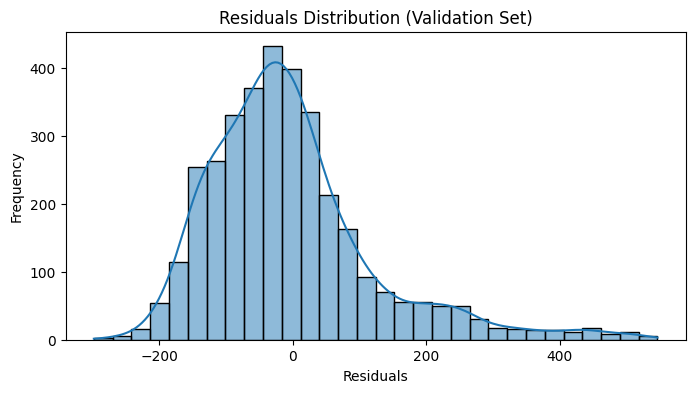

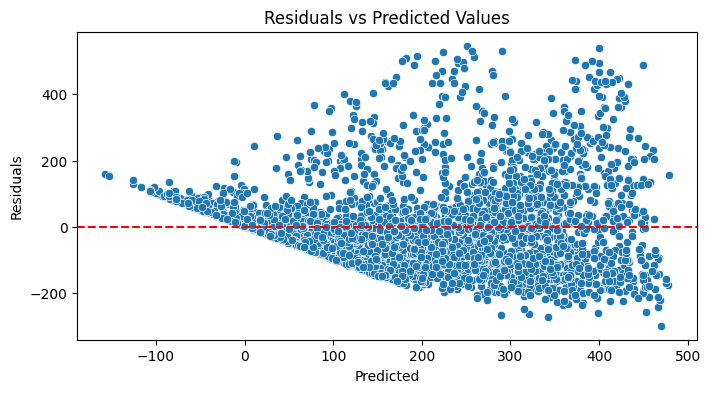

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_val - y_val_pred

# Plot residuals distribution
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution (Validation Set)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Residuals vs Predictions
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_val_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


TASK 5: RANDOM FOREST REGRESSION


In [84]:
from sklearn.ensemble import RandomForestRegressor

# Initialize with default settings
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on validation set
y_val_rf = rf_model.predict(X_val)


In [85]:
# Evaluation metrics
mse_rf = mean_squared_error(y_val, y_val_rf)
mae_rf = mean_absolute_error(y_val, y_val_rf)
r2_rf = r2_score(y_val, y_val_rf)

print(f"Random Forest Performance on Validation Set:")
print(f"  MSE: {mse_rf:.2f}")
print(f"  MAE: {mae_rf:.2f}")
print(f"  R²: {r2_rf:.4f}")


Random Forest Performance on Validation Set:
  MSE: 1801.72
  MAE: 25.80
  R²: 0.9446


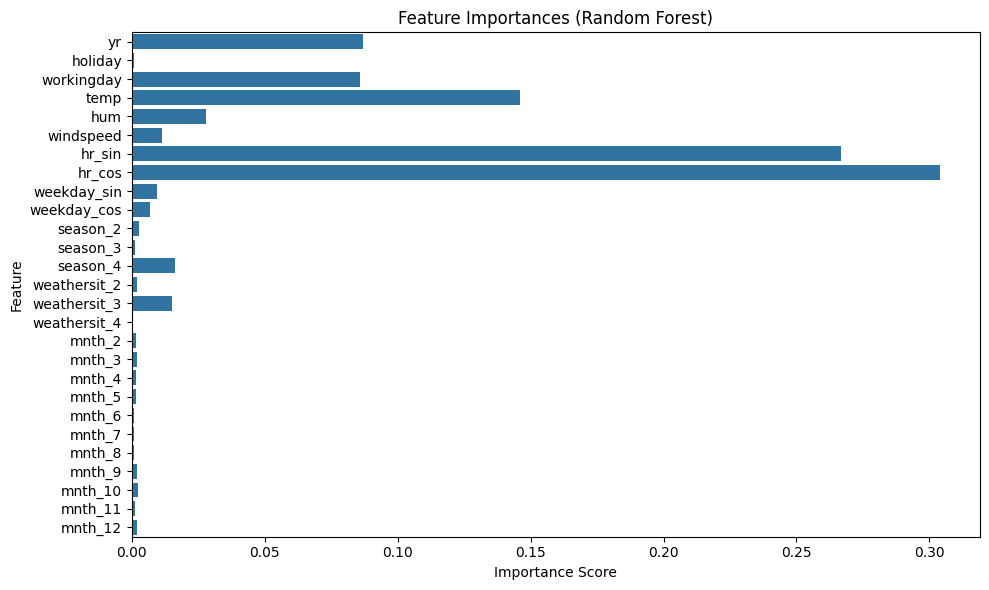

In [86]:
# Feature importance
importances = rf_model.feature_importances_
features = X_train.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


TASK 6: Gradient Boosting Regressor.

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

# Train sklearn Gradient Boosting
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Predict
y_val_gbr = gbr_model.predict(X_val)


In [88]:
# Metrics
mse_gbr = mean_squared_error(y_val, y_val_gbr)
mae_gbr = mean_absolute_error(y_val, y_val_gbr)
r2_gbr = r2_score(y_val, y_val_gbr)

print("Gradient Boosting (sklearn) Performance on Validation Set:")
print(f"  MSE: {mse_gbr:.2f}")
print(f"  MAE: {mae_gbr:.2f}")
print(f"  R²: {r2_gbr:.4f}")


Gradient Boosting (sklearn) Performance on Validation Set:
  MSE: 4519.74
  MAE: 47.15
  R²: 0.8609


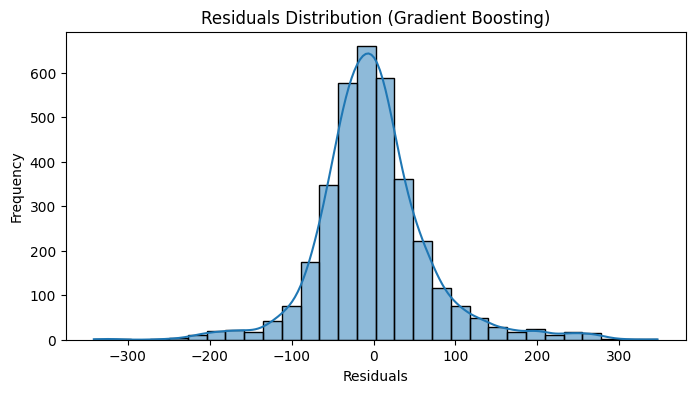

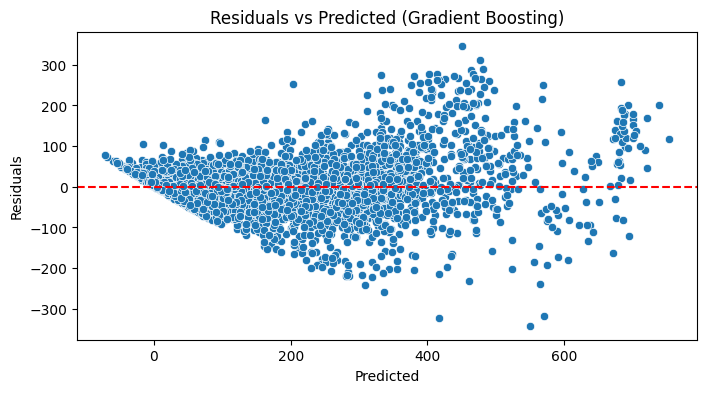

In [89]:
# Residuals
residuals_gbr = y_val - y_val_gbr

# Plot distribution
plt.figure(figsize=(8, 4))
sns.histplot(residuals_gbr, bins=30, kde=True)
plt.title("Residuals Distribution (Gradient Boosting)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Plot scatter
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_val_gbr, y=residuals_gbr)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted (Gradient Boosting)")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


TASK 7: HYPERPARAMETER TUNING

In [90]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter space
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search
rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_params,
    n_iter=20,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

rf_random_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_squared_error', verbose=1)

In [91]:
best_rf = rf_random_search.best_estimator_
y_val_rf_tuned = best_rf.predict(X_val)

print("Best RF Params:", rf_random_search.best_params_)
print("Tuned Random Forest Performance:")
print(f"  MSE: {mean_squared_error(y_val, y_val_rf_tuned):.2f}")
print(f"  MAE: {mean_absolute_error(y_val, y_val_rf_tuned):.2f}")
print(f"  R²: {r2_score(y_val, y_val_rf_tuned):.4f}")


Best RF Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Tuned Random Forest Performance:
  MSE: 1808.50
  MAE: 25.88
  R²: 0.9444


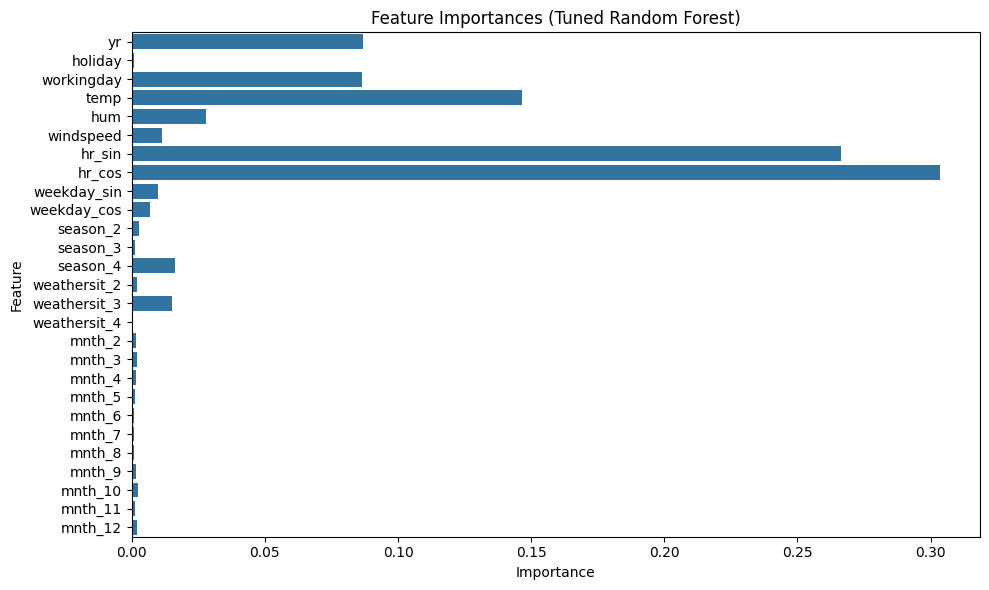

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(x=best_rf.feature_importances_, y=X_train.columns)
plt.title('Feature Importances (Tuned Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [94]:
pip install scikit-optimize



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [95]:
from skopt import BayesSearchCV
search_space = {
    'n_estimators': (50, 300),
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'subsample': (0.5, 1.0)
}


In [96]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

opt = BayesSearchCV(
    gbr,
    search_spaces=search_space,
    n_iter=20,
    cv=5,
    random_state=42,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

opt.fit(X_train, y_train)


BayesSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
              n_iter=20, n_jobs=-1, random_state=42,
              scoring='neg_mean_squared_error',
              search_spaces={'learning_rate': (0.01, 0.3, 'log-uniform'),
                             'max_depth': (3, 10), 'n_estimators': (50, 300),
                             'subsample': (0.5, 1.0)})

In [97]:
best_gbr = opt.best_estimator_
y_val_gbr_tuned = best_gbr.predict(X_val)

print("Best GBR Params:", opt.best_params_)
print("Tuned Gradient Boosting Performance:")
print(f"  MSE: {mean_squared_error(y_val, y_val_gbr_tuned):.2f}")
print(f"  MAE: {mean_absolute_error(y_val, y_val_gbr_tuned):.2f}")
print(f"  R²: {r2_score(y_val, y_val_gbr_tuned):.4f}")


Best GBR Params: OrderedDict({'learning_rate': 0.040726180550054995, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.553444204100766})
Tuned Gradient Boosting Performance:
  MSE: 1442.04
  MAE: 23.16
  R²: 0.9556


TASK 9: MODEL SELECTION AND TEST SET EVALUATION

In [98]:
# Combine X and y
X_final_train = pd.concat([X_train, X_val])
y_final_train = pd.concat([y_train, y_val])


In [99]:
# Use best hyperparameters
final_model = GradientBoostingRegressor(
    learning_rate=opt.best_params_['learning_rate'],
    n_estimators=opt.best_params_['n_estimators'],
    max_depth=opt.best_params_['max_depth'],
    subsample=opt.best_params_['subsample'],
    random_state=42
)

final_model.fit(X_final_train, y_final_train)


GradientBoostingRegressor(learning_rate=0.040726180550054995, max_depth=8,
                          n_estimators=300, random_state=42,
                          subsample=0.553444204100766)

In [101]:
# Predict on test set
y_test_pred = final_model.predict(X_test)

# Final evaluation
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(" Final Model Performance on Test Set:")
print(f"  MSE: {mse_test:.2f}")
print(f"  MAE: {mae_test:.2f}")
print(f"  R²: {r2_test:.4f}")


 Final Model Performance on Test Set:
  MSE: 1489.68
  MAE: 22.79
  R²: 0.9526
